# What's Causing Heavy Traffic on I-94?

This project looks at potential indicators of heavy traffic specifically on westbound I-94 (cars moving from east to west). Vehicles were counted from a specific station along this route. Data was generated by UCI MLRep.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
# add matplotlib inline 
%matplotlib inline
import seaborn as sns

In [2]:
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [4]:
traffic.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
traffic.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [6]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


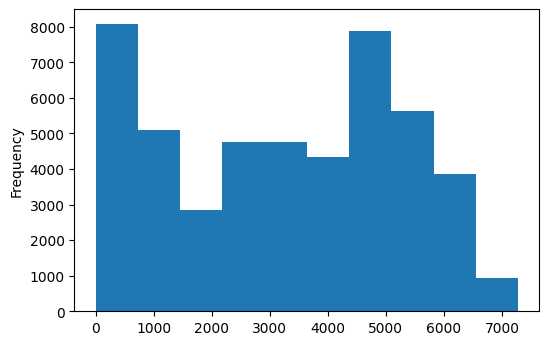

In [10]:
# quick histogram to look at Traffic Volume
traffic['traffic_volume'].plot.hist()

In [11]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The traffic volume counted 48,204 vehicles. The min number of vehicles that crossed the station was 0 and the max number was 7,280. Looking at the histogram we see an assymetrical distribution with two points that stick out. The first bar is a traffic volume of 0-500 vehicles and occurred ~8,000 times. The second bar is a traffic volume of 4,500 - 5,000 vehicles which occurred close to 8,000 times. These two counts, a large and a small number of vehicles, indicate two different conditions. For example, these may represent day vs. night trips, poor weather vs. good weather trips, or possibly holidays vs. work days. 

There are two additional things to look at: 25% of the time there are 1,193 vehicles and 25% of the time there are 4,922 vehicles. 25% of the time there are more than 4X the number of vehicles present on this section of I-94. It's likely that this represents day vs. night traffic. 

Let's dig into this a bit by splitting the dataset in to two time periods of 12 hours each: daytime (7am - 7pm) and nighttime (7pm - 7am).

## Day time is the right time

In [18]:
# format the date and time column 
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
# verify time is in 24 hour
traffic['date_time']

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

In [28]:
# split the data into two sets
# day time data is 0700 - 1900, greater than or equal to 0700 and less than 1900
# night time data is 1900 - 0700, greater than or equal to 1900 and less than 0700

day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & 
                    (traffic['date_time'].dt.hour < 19)]

night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) |
                     (traffic['date_time'].dt.hour < 7)]         

In [29]:
# check data 
day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [30]:
# check data 
night.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963


In [32]:
# does day match night?
day.shape

(24327, 9)

In [33]:
night.shape

(24327, 9)

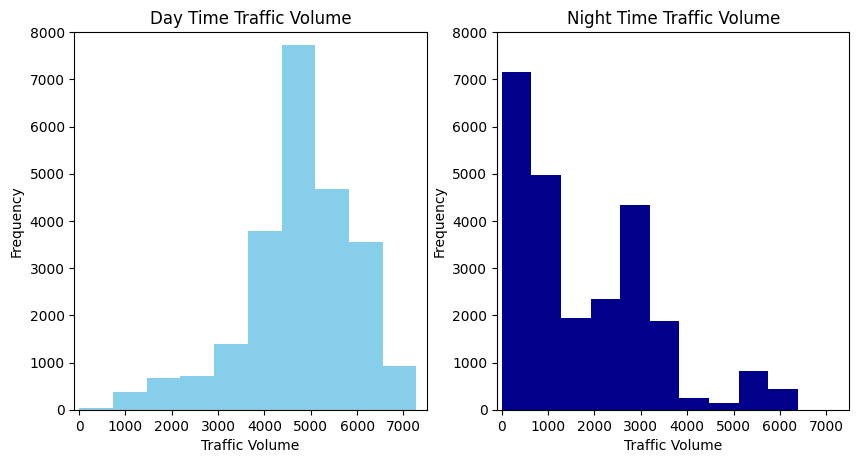

In [47]:
# plot the histogram for each, and compare 

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'], color = "skyblue")
plt.title('Day Time Traffic Volume')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'], color = "darkblue")
plt.title('Night Time Traffic Volume')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)

plt.show()

In [48]:
day.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452
std,13.298885,63.62932,0.008853,37.564588,1174.546482
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000


In [45]:
night.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000
mean,280.173600,0.139145,0.000192,45.672011,1785.377441
std,13.296357,1.110872,0.007434,40.048382,1441.951197
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.700000,0.000000,0.000000,1.000000,530.000000
50%,281.379000,0.000000,0.000000,40.000000,1287.000000
75%,290.700000,0.000000,0.000000,90.000000,2819.000000
max,307.680000,55.630000,0.510000,100.000000,6386.000000


The histograms are very different. The day time volume is slightly skewed left and the night time volume is skewed right. The daytime volume will likely have indicators that can explain delays, however, the nighttime data does have vehicle count at ~3,000 occurring more than 4,000 times that could be interesting to look at. Clearly the histograms indicate daytime will have the juciest indicators for traffic.

Commute times often have the highest vehicle count; everyone is on the road trying to get to work and leave from work in the same blocks of time. Time of year can also be a factor. Let's look at time and traffic volume for month, week day, and time of day.

In [49]:
# group traffic volume together for each month
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

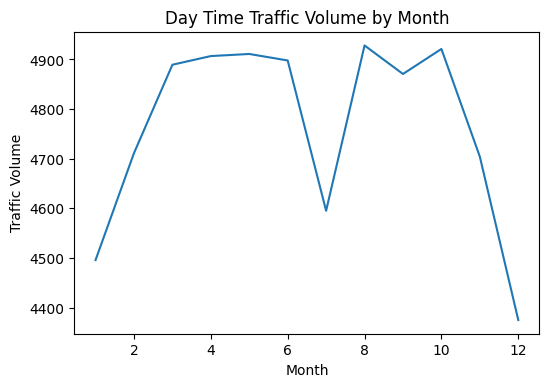

In [53]:
by_month['traffic_volume'].plot.line()
plt.title('Average Day Time Traffic Volume by Month')
plt.ylabel('Traffic Volume')
plt.xlabel('Month')
plt.show()

There are three major drops in average daytime traffic volume. The first starts in January and is likely due to the holiday season and New Years when many people have the day off from work. This corresponds to the steep drop off in December. During this holiday season, again, many people may not be driving on I-94 westbound. Traffic is highest during two ranges: March to June and September to November. These correspond to the school year. 

The drop in the middle occurs in July. This likely corresponds to the July 4th holiday which is taken very seriously by folks in the middle of the country and who may not be driving during this 3-day weekend holiday.

In [54]:
# group traffic volume by day of the week, 0 is Monday, 6 is Sunday
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

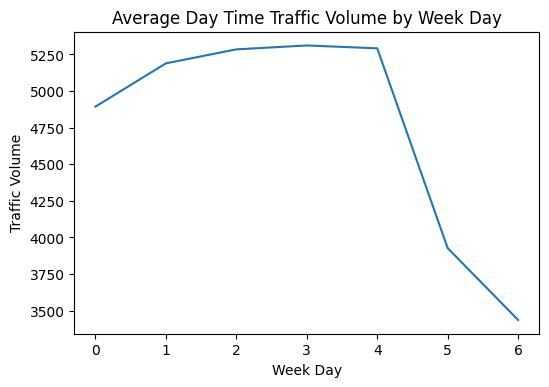

In [55]:
by_dayofweek['traffic_volume'].plot.line()
plt.title('Average Day Time Traffic Volume by Week Day')
plt.ylabel('Traffic Volume')
plt.xlabel('Week Day')
plt.show()

The average daytime traffic volume remains fairly consistent Monday through Friday, which corresponds to the work week. It drops down on Saturday and is at its lowest volume on Sundays. 

In [64]:
# group traffic volume by time of day for daytime volume only 
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

In [65]:
by_hour_business['traffic_volume']

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

In [67]:
by_hour_weekend['traffic_volume']

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64

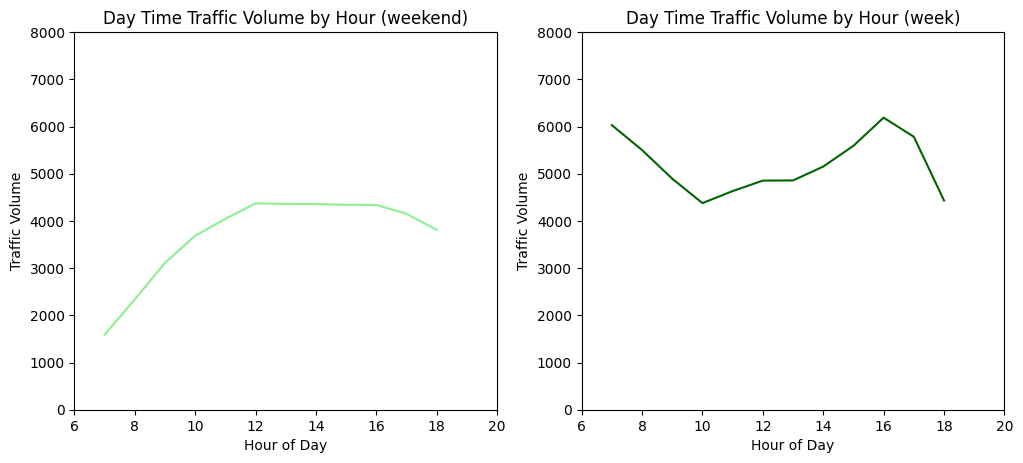

In [77]:
# plot by hour on the weekend and by hour on the business week

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
by_hour_weekend['traffic_volume'].plot.line(color = "lightgreen")
plt.title('Day Time Traffic Volume by Hour (weekend)')
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')
plt.xlim(6, 20)
plt.ylim(0, 8000)

plt.subplot(1, 2, 2)
by_hour_business['traffic_volume'].plot.line(color = "darkgreen")
plt.title('Day Time Traffic Volume by Hour (week)')
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')
plt.xlim(6, 20)
plt.ylim(0, 8000)

plt.show()

During the weekend, there us much less traffic volume than during the week. There is a consistent volume, ~4,500 vehicles, during the hours of noon to 4:00 pm. During Monday through Friday there is a high volume that occurs at two main points: 7am and 4pm. After 4:30 pm there is a steep drop off. These times are likely "rush hour" where volume is at its highest. 

## Heavy weather = Heavy traffic?

For fun, let's see what happens regarding weather. Light rain in California freaks out drivers and accidents jump, does it happen on westbound I-94?

This dataset has information on different types of weather and the temperature. Do they correlate to traffic volume?

In [80]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Out of the weather options the highest correlation is between day time traffic volume and temp. It doesn't appear that rain or snow or clouds has much impact on traffic! If it snowed in California (anywhere besides the mountains) folks would lose their minds, everything would be shut down immediately!

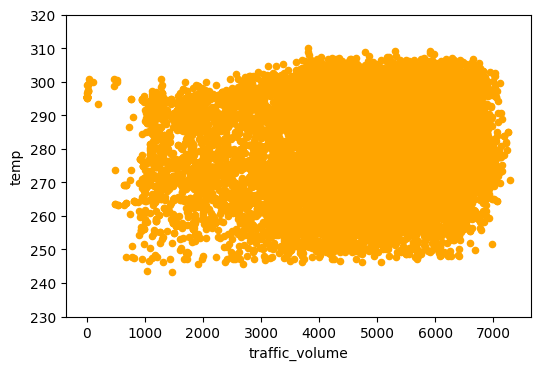

In [82]:
# plot temperature and traffic volume 
day.plot.scatter('traffic_volume', 'temp', color = 'orange')
plt.ylim(230, 320)
plt.show()

There is no correlation between temperature and traffic volume.

There are two columns concerning weather that hasn't been looked at: weather_main and weather_description. Let's look at these columns. 

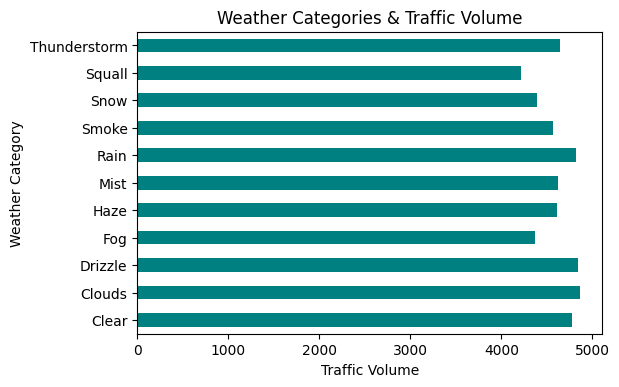

In [97]:
# group by average weather-main
by_weather_main = day.groupby('weather_main').mean()

by_weather_main['traffic_volume'].plot.barh(color = 'teal')
plt.title('Weather Categories & Traffic Volume')
plt.ylabel('Weather Category')
plt.xlabel('Traffic Volume')
plt.show()

These categories don't explain much. Traffic volume is pretty consistent and there are no categories that have a volume over 5,000 vehicles. 

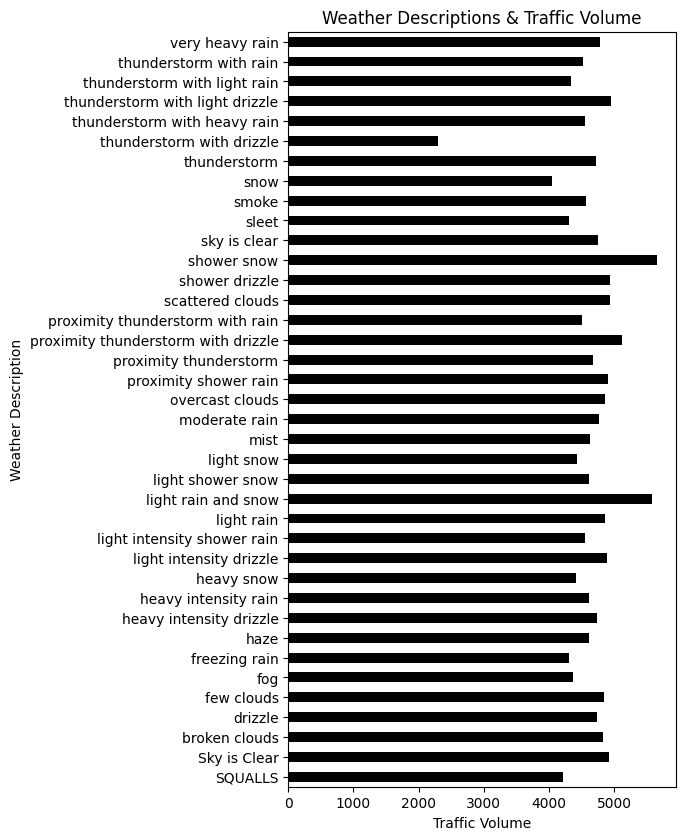

In [104]:
# group by average weather_description
by_weather_description = day.groupby('weather_description').mean()

plt.figure(figsize=(5,10))
by_weather_description['traffic_volume'].plot.barh(color = 'black')
plt.title('Weather Descriptions & Traffic Volume')
plt.ylabel('Weather Description')
plt.xlabel('Traffic Volume')
plt.show()


Here we can see "shower snow" and "light rain and snow" stick out and have traffic volume over 5,000 vehicles. This makes sense in  way, people are more likely to drive when there is rain.

I'm not sure what "shower snow" is but it doesn't sound fun and looks as if traffic volume is associated with it. likely for the same reason as "light rain and snow." Riding your bike to work or school in the rain stinks!